# CS 3110/5110: Data Privacy
## In-Class Exercises, week of 9/11/2023

In [12]:
# Load the data and libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

adult = pd.read_csv('https://github.com/jnear/cs3110-data-privacy/raw/main/homework/adult_with_pii.csv')

## Question 1

Write a *counting query* to determine whether or not Karrie Trusslove's age is 39.

In [13]:
def karrie_query():
    karries_row = adult[adult['Name'] == 'Karrie Trusslove']
    return karries_row[karries_row['Age'] == 39].shape[0]

In [14]:
# TEST CASE 

assert karrie_query() == 1

## Question 2

Add Laplace noise to the counting query you wrote in the last question to ensure differential privacy for $\epsilon = 1.0$.

In [15]:
sensitivity = 1 # Always sens 1 for counting query
epsilon = 1.0   # Spec

def dp_karrie_query():    
    karries_row = adult[adult['Name'] == 'Karrie Trusslove']
    return karries_row[karries_row['Age'] == 39].shape[0] + np.random.laplace(loc=0, scale=sensitivity/epsilon)

In [16]:
# TEST CASE 

q2_runs = [dp_karrie_query() for _ in range(100)]
noise_runs = [np.random.laplace(loc=1, scale=1/epsilon) for _ in range(100)]

assert stats.wasserstein_distance(q2_runs, noise_runs) < 1

## Question 3

In 2-4 sentences, describe how `dp_karrie_query` protects Karrie's privacy.

`dp_karrie_query` protects Karrie's privacy by adding random noise to the result of the query. If tuned correctly this keeps the returned data useful enough for analysis but not so precise that it could potentially identify Karrie.

## Question 4

Implement a function to construct an *empirical distribution* over random samples from the Laplace distribution with location 0 and scale `scale`. Use 1000 samples.

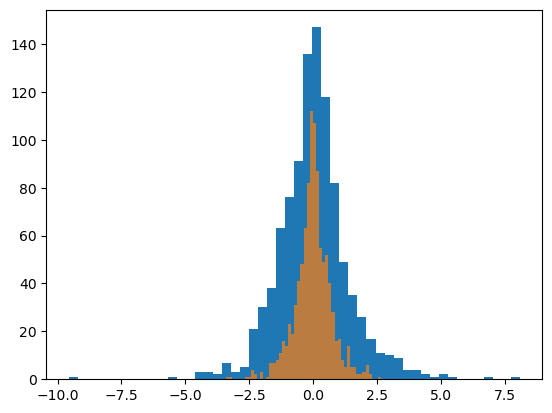

In [17]:
def empirical_dist_lap(scale):
    return [np.random.laplace(loc=0, scale=scale) for x in range(1000)]

epsilon1 = 1.0
epsilon2 = 2.0

plt.hist(empirical_dist_lap(1/epsilon1), bins=50);
plt.hist(empirical_dist_lap(1/epsilon2), bins=50, alpha=.7);

In [18]:
# PLACEHOLDER for test cases


## Question 5

Consider the program below.

In [19]:
counting_query = lambda: 1

result_1 = counting_query() + np.random.laplace(loc=0, scale=1/epsilon1)
result_2 = counting_query() + np.random.laplace(loc=0, scale=1/epsilon2)
result_3 = counting_query() + np.random.laplace(loc=0, scale=1/epsilon1)

print(result_1, result_2, result_3)

1.3187889368956178 1.6192433092260228 -0.09251513218043517


Write a function `total_epsilon` that returns the total privacy cost for this program.

In [20]:
# This blatantly isn't right I'm just baffled

def total_epsilon():
    return result_1 + result_2 + result_3

In [21]:
# Placeholder for test case
